# Part 1: WeatherPy
### Uses citipy and Open Weather Map API to find weather details for a list of random cities, and discovers any correlation between the weather patterns and the location of the city.

## 3 Observable Trends:
1. As shown in the scatter plot: ***Temperature vs. Latitude***, the temperature of a given location correlates with its latitude. 
> As you move from *-60 to 20 degrees latitude*, the temperature increases from **40 to 100 degrees F**, and as you move from *20 to 80 degrees latitude*, the temperature decreases from **100 to below 0 degrees F**. This trend proves what we already know about the temperature as you move towards and away from the equator (0 degrees latitude).


2. The ***Humidity vs. Latitude***, ***Cloudiness vs. Latitude***, and ***Wind Speed vs. Latitude*** scatter plots show that these factors do not have significant correlations between each other. They show that the degree of latitude you are near cannot easily predict the humidity, cloudiness, or wind speed.

3. When the hemispheres were divided into the **Northern Hemisphere and Southern Hemispheres**:

> The **Northern Hemisphere** seemed to have a ***more significant relationship*** between *temperature and latitude*, while the **Southern Hemisphere** also seemed to have a significant relationship, but its r-value was much lower than the Northern Hemisphere's r-value.

> The wind speed in the Northern Hemisphere also peaked at **40 mph**, while the wind speed in the Southern Hemisphere peaked at **25 mph**. This could suggest that the Northern Hemisphere is more likely to have higher wind speeds. Though, the difference in speeds could be caused by a difference in the number of datapoints for each hemisphere.

In [1]:
#!pip install citipy

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
from scipy import stats
from scipy.stats import linregress
# Import api key
from config import api_key
# Import citipy for city names by long. and lat.
from citipy import citipy

# Import style
%matplotlib inline
from matplotlib import style
style.use('seaborn')

In [2]:
# Define ranges for longitude and latitude
latitude_range = (-90,90)
longitude_range = (-180,180)

In [3]:
# Create lists for coordinates and cities
lat_long_coord = []
cities = []

# Create random latitude and longitude combinations - 1500 at the end
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
lat_long_coord = zip(latitude, longitude)

# Build a for loop to find city names for random coordinates
for lat_long in lat_long_coord:
    city = citipy.nearest_city(lat_long[0], lat_long[1])
    city = city.city_name
    
    # Add the city to a list if it is unique
    if city not in cities:
        cities.append(city)

In [4]:
# Check length of the list
len(cities)
#print(cities)

585

In [5]:
# Create base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"
# define units
units = "imperial"

# Build query url with units
query_url = f"{base_url}&units={units}&q="

In [6]:
# Create lists for results
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_reduced = []
latitude_reduced = []
longitude_reduced = []

In [7]:
# Loop through cities to find results
index = 0

for city in cities:
    
    # Create url for city
    full_url = f"{query_url}{city}"
    index += 1
    
    try:
    # Find json response for city
        response = requests.get(full_url).json()
        city_number = response["id"]
        
        # Find data to append for each city
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        weather_date = response["dt"]
        
        
         # Print text about: Append results
        print(f"City {index} of {len(cities)}: {city} found. City Number: {city_number}. Appending results.")
        
        # Append all results
        cities_reduced.append(city)
        latitude_reduced.append(lat)
        longitude_reduced.append(long)
        temperature.append(temp_max)
        humidity.append(humid)
        cloudiness.append(clouds)
        wind_speed.append(wind)
        countries.append(country)
        dates.append(weather_date)
        
        
    except KeyError:
        print(f"{city} not found.")
        

City 1 of 585: butaritari found. City Number: 2110227. Appending results.
City 2 of 585: barrow found. City Number: 5880054. Appending results.
City 3 of 585: atuona found. City Number: 4020109. Appending results.
City 4 of 585: tasiilaq found. City Number: 3424607. Appending results.
City 5 of 585: puerto ayora found. City Number: 3652764. Appending results.
City 6 of 585: seoul found. City Number: 1835848. Appending results.
City 7 of 585: hobart found. City Number: 2163355. Appending results.
City 8 of 585: busselton found. City Number: 2075265. Appending results.
City 9 of 585: victoria found. City Number: 1819729. Appending results.
amderma not found.
City 11 of 585: margate found. City Number: 2643044. Appending results.
City 12 of 585: stara synyava found. City Number: 692866. Appending results.
City 13 of 585: fairbanks found. City Number: 5861897. Appending results.
City 14 of 585: hilo found. City Number: 5855927. Appending results.
City 15 of 585: sierra vista found. City Nu

City 125 of 585: mount gambier found. City Number: 2156643. Appending results.
City 126 of 585: vetluga found. City Number: 473910. Appending results.
City 127 of 585: norman wells found. City Number: 6089245. Appending results.
City 128 of 585: mao found. City Number: 2514301. Appending results.
City 129 of 585: tangi found. City Number: 1163927. Appending results.
City 130 of 585: kokkola found. City Number: 651943. Appending results.
City 131 of 585: felanitx found. City Number: 2517750. Appending results.
City 132 of 585: nichlaul found. City Number: 1261451. Appending results.
City 133 of 585: batagay found. City Number: 2027044. Appending results.
City 134 of 585: iqaluit found. City Number: 5983720. Appending results.
City 135 of 585: severo-kurilsk found. City Number: 2121385. Appending results.
City 136 of 585: menongue found. City Number: 3347353. Appending results.
City 137 of 585: faya found. City Number: 110690. Appending results.
ngukurr not found.
City 139 of 585: dabeib

City 241 of 585: shubarkuduk found. City Number: 608271. Appending results.
City 242 of 585: neiafu found. City Number: 4032420. Appending results.
City 243 of 585: presidencia roque saenz pena found. City Number: 3840300. Appending results.
City 244 of 585: nelson bay found. City Number: 2155562. Appending results.
City 245 of 585: cascais found. City Number: 2269594. Appending results.
lolua not found.
juifang not found.
City 248 of 585: cayenne found. City Number: 3382160. Appending results.
City 249 of 585: saint-joseph found. City Number: 6690296. Appending results.
City 250 of 585: kudahuvadhoo found. City Number: 1337607. Appending results.
City 251 of 585: manono found. City Number: 209598. Appending results.
City 252 of 585: vila franca do campo found. City Number: 3372472. Appending results.
City 253 of 585: chernyshevskiy found. City Number: 2025456. Appending results.
City 254 of 585: casas grandes found. City Number: 4015076. Appending results.
City 255 of 585: esil found.

City 358 of 585: kragujevac found. City Number: 789128. Appending results.
City 359 of 585: ibajay found. City Number: 1711404. Appending results.
City 360 of 585: quatre cocos found. City Number: 1106643. Appending results.
City 361 of 585: dwarka found. City Number: 1272140. Appending results.
City 362 of 585: licata found. City Number: 2524393. Appending results.
City 363 of 585: mabopane found. City Number: 980921. Appending results.
City 364 of 585: genhe found. City Number: 2037252. Appending results.
City 365 of 585: san francisco found. City Number: 5391959. Appending results.
City 366 of 585: ola found. City Number: 2122574. Appending results.
City 367 of 585: airai found. City Number: 1651810. Appending results.
City 368 of 585: chokurdakh found. City Number: 2126123. Appending results.
City 369 of 585: boyle found. City Number: 4285317. Appending results.
City 370 of 585: bathurst found. City Number: 2176632. Appending results.
City 371 of 585: vilyuysk found. City Number: 2

City 473 of 585: okha found. City Number: 2122614. Appending results.
bargal not found.
City 475 of 585: andros town found. City Number: 3572906. Appending results.
City 476 of 585: yinchuan found. City Number: 1786657. Appending results.
City 477 of 585: rio grande found. City Number: 3451138. Appending results.
City 478 of 585: orizona found. City Number: 3455786. Appending results.
City 479 of 585: morro bay found. City Number: 5374920. Appending results.
warqla not found.
marcona not found.
City 482 of 585: nalut found. City Number: 2214432. Appending results.
City 483 of 585: borovskoy found. City Number: 1525121. Appending results.
City 484 of 585: rudnyy found. City Number: 1519843. Appending results.
City 485 of 585: tateyama found. City Number: 1850523. Appending results.
City 486 of 585: limon found. City Number: 3622247. Appending results.
grand river south east not found.
City 488 of 585: koumac found. City Number: 2140558. Appending results.
karamay not found.
City 490 of 

In [69]:
# Create DataFrame from series
weather_data = pd.DataFrame({
    "City": cities_reduced,
    "Latitude": latitude_reduced,
    "Longitude": longitude_reduced,
    "Max Temp.": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})
#weather_data = pd.DataFrame(weather_data)

# Get HTML for dataframe table
html = weather_data.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Latitude</th>
      <th>Longitude</th>
      <th>Max Temp.</th>
      <th>Humidity</th>
      <th>Cloudiness</th>
      <th>Wind Speed</th>
      <th>Country</th>
      <th>Date</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>butaritari</td>
      <td>3.0707</td>
      <td>172.7902</td>
      <td>81.84</td>
      <td>80</td>
      <td>100</td>
      <td>18.30</td>
      <td>KI</td>
      <td>1621981016</td>
    </tr>
    <tr>
      <th>1</th>
      <td>barrow</td>
      <td>71.2906</td>
      <td>-156.7887</td>
      <td>26.62</td>
      <td>86</td>
      <td>90</td>
      <td>6.91</td>
      <td>US</td>
      <td>1621981016</td>
    </tr>
    <tr>
      <th>2</th>
      <td>atuona</td>
      <td>-9.8000</td>
      <td>-139.0333</td>
      <td>79.93</td>
      <td>61</td>
      <td>30</td>
      <td>13.98</td>
      <td>PF</td>
      <

In [9]:
# Convert Unix timestamp to readable date using datetime module
from datetime import datetime

weather_data["Date Converted"] = pd.to_datetime(weather_data["Date"], unit='s')

dates_converted = weather_data["Date Converted"]

In [10]:
# Display converted time
weather_data

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date,Date Converted
0,butaritari,3.0707,172.7902,81.84,80,100,18.30,KI,1621981016,2021-05-25 22:16:56
1,barrow,71.2906,-156.7887,26.62,86,90,6.91,US,1621981016,2021-05-25 22:16:56
2,atuona,-9.8000,-139.0333,79.93,61,30,13.98,PF,1621980913,2021-05-25 22:15:13
3,tasiilaq,65.6145,-37.6368,37.56,89,100,46.57,GL,1621981017,2021-05-25 22:16:57
4,puerto ayora,-0.7393,-90.3518,84.16,87,35,8.01,EC,1621981018,2021-05-25 22:16:58
...,...,...,...,...,...,...,...,...,...,...
528,paita,-5.0892,-81.1144,71.87,80,20,14.58,PE,1621981314,2021-05-25 22:21:54
529,yangjiang,21.8500,111.9667,78.03,91,52,2.39,CN,1621981314,2021-05-25 22:21:54
530,sambava,-14.2667,50.1667,69.26,87,10,6.71,MG,1621981315,2021-05-25 22:21:55
531,kundiawa,-6.0167,144.9667,66.18,93,100,1.41,PG,1621981315,2021-05-25 22:21:55


In [11]:
# Output dataframe to csv
weather_data.to_csv("./OutputData/cities_weather_data.csv", encoding="utf-8", index=False)

In [12]:
# Bring dataframe back in
weather_data_df = pd.read_csv("./OutputData/cities_weather_data.csv")

# Remove Unix Timestamp
weather_data_df = weather_data_df[["City", "Latitude", "Longitude", "Max Temp.", "Humidity", "Cloudiness",
                                  "Wind Speed", "Country", "Date Converted"]]
# Rename column
weather_data_df = weather_data_df.rename(columns = {"Date Converted": "Date"})

weather_data_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.84,80,100,18.30,KI,2021-05-25 22:16:56
1,barrow,71.2906,-156.7887,26.62,86,90,6.91,US,2021-05-25 22:16:56
2,atuona,-9.8000,-139.0333,79.93,61,30,13.98,PF,2021-05-25 22:15:13
3,tasiilaq,65.6145,-37.6368,37.56,89,100,46.57,GL,2021-05-25 22:16:57
4,puerto ayora,-0.7393,-90.3518,84.16,87,35,8.01,EC,2021-05-25 22:16:58
...,...,...,...,...,...,...,...,...,...
528,paita,-5.0892,-81.1144,71.87,80,20,14.58,PE,2021-05-25 22:21:54
529,yangjiang,21.8500,111.9667,78.03,91,52,2.39,CN,2021-05-25 22:21:54
530,sambava,-14.2667,50.1667,69.26,87,10,6.71,MG,2021-05-25 22:21:55
531,kundiawa,-6.0167,144.9667,66.18,93,100,1.41,PG,2021-05-25 22:21:55


In [13]:
# Find max and min of Humidity
weather_data_df["Humidity"].describe()

count    533.000000
mean      68.054409
std       22.718836
min        5.000000
25%       57.000000
50%       74.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

## Temperature vs. Latitude

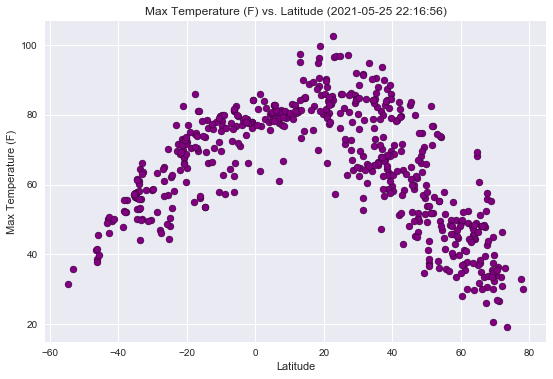

In [70]:
style.use('seaborn')
# Create Scatter Plot for Temp vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp."], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Max Temperature (F) vs. Latitude ({dates_converted[0]})")
#plt.grid()
plt.savefig("./Images/temp_lat.png", bbox_inches="tight")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***max temperature in degrees Fahrenheit*** for that location on a given day. The graph suggests that there is a relationship between these two factors, since they fall along the same line. It shows that as you move from *-60 to 20 degrees latitude*, the temperature increases from 40 to 100 degrees F, and as you move from *20 to 80 degrees latitude*, the temperature decreases from 100 to below 0 degrees F. This suggests that the equator (at *0 degrees latitude*) is where the temperature is the hottest. 

## Humidity vs. Latitude

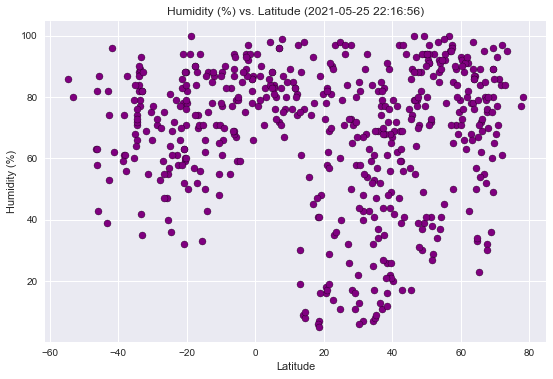

In [71]:
# Create Scatter Plot for Humidity vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity (%) vs. Latitude ({dates_converted[0]})")
plt.savefig("./Images/humidity_lat.png", bbox_inches="tight")
plt.show()

### Analysis: 
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***percentage of humidity*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This may show that the **humidity** may be consistently higher in the southern hemisphere (below 0 degrees latitude), and rarely reaching below 20% humidity, in comparison to the northern hemisphere.

## Cloudiness vs. Latitude

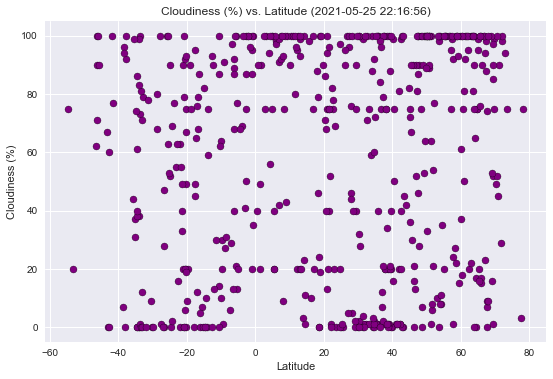

In [72]:
# Create Scatter Plot for Cloudiness vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness (%) vs. Latitude ({dates_converted[0]})")
plt.savefig("./Images/cloudiness_lat.png", bbox_inches="tight")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***percentage of cloudiness*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This shows that the **percentage of cloudiness** cannot be determined by where you are, whether in the southern or northern hemisphere. 

## Wind Speed vs. Latitude

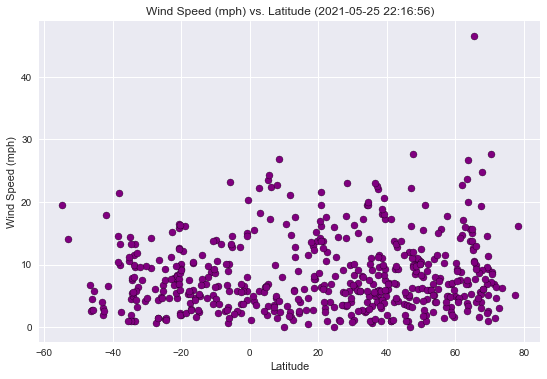

In [73]:
# Create Scatter Plot for Wind Speed vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed (mph) vs. Latitude ({dates_converted[0]})")
plt.savefig("./Images/windspeed_lat.png", bbox_inches="tight")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***wind speed in miles per hour*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This shows that the **wind speed** cannot be determined by where you are, whether in the southern or northern hemisphere. For the most part, on this given day, the wind speeds were relatively low (most being below 20 mph) across both hemispheres.

In [44]:
# Create separate northern hemisphere dataframe
northern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0, :]
northern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.84,80,100,18.30,KI,2021-05-25 22:16:56
1,barrow,71.2906,-156.7887,26.62,86,90,6.91,US,2021-05-25 22:16:56
3,tasiilaq,65.6145,-37.6368,37.56,89,100,46.57,GL,2021-05-25 22:16:57
5,seoul,37.5683,126.9778,56.64,68,100,4.43,KR,2021-05-25 22:14:36
8,victoria,22.2855,114.1577,85.32,90,82,10.58,HK,2021-05-25 22:13:57
...,...,...,...,...,...,...,...,...,...
524,penzance,50.1186,-5.5371,49.21,94,100,12.48,GB,2021-05-25 22:21:52
526,tommot,58.9564,126.2925,46.87,80,100,1.99,RU,2021-05-25 22:21:53
527,dosso,13.0490,3.1937,97.43,19,93,5.79,NE,2021-05-25 22:19:01
529,yangjiang,21.8500,111.9667,78.03,91,52,2.39,CN,2021-05-25 22:21:54


In [45]:
# Create separate southern hemisphere dataframe
southern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] < 0, :]
southern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
2,atuona,-9.8000,-139.0333,79.93,61,30,13.98,PF,2021-05-25 22:15:13
4,puerto ayora,-0.7393,-90.3518,84.16,87,35,8.01,EC,2021-05-25 22:16:58
6,hobart,-42.8794,147.3294,50.25,82,0,3.00,AU,2021-05-25 22:14:02
7,busselton,-33.6500,115.3333,44.04,77,100,9.60,AU,2021-05-25 22:16:59
14,hermanus,-34.4187,19.2345,57.90,74,61,7.52,ZA,2021-05-25 22:17:01
...,...,...,...,...,...,...,...,...,...
522,kaoma,-14.7833,24.8000,53.49,66,0,5.30,ZM,2021-05-25 22:21:51
525,sao joao da barra,-21.6403,-41.0511,69.30,70,55,9.71,BR,2021-05-25 22:21:52
528,paita,-5.0892,-81.1144,71.87,80,20,14.58,PE,2021-05-25 22:21:54
530,sambava,-14.2667,50.1667,69.26,87,10,6.71,MG,2021-05-25 22:21:55


# Linear Regression:

# Temperature vs. Latitude

## Northern Hemisphere:

In [66]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Max Temp."])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      92.930680
1      40.516164
3      44.877209
5      66.425584
8      78.167621
         ...    
524    56.782974
526    49.992741
527    85.264181
529    78.502223
532    42.127555
Name: Latitude, Length: 364, dtype: float64
y = -0.77x + 95.29


The r-value is: 0.6373973068425414


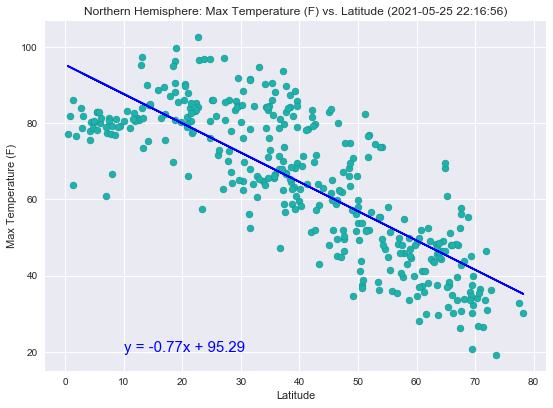

In [67]:
# Create Plot: Temp vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Max Temp."], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Northern Hemisphere: Max Temperature (F) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (10,20), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [48]:
# Perform a linear regression on temperature vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Max Temp."])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

2      73.714191
4      80.572669
6      48.674808
7      55.660983
14     55.079117
         ...    
522    69.942092
525    64.751700
528    77.280021
530    70.333132
531    76.577952
Name: Latitude, Length: 169, dtype: float64
y = 0.76x + 81.13


The r-value is: 0.6546141574231088


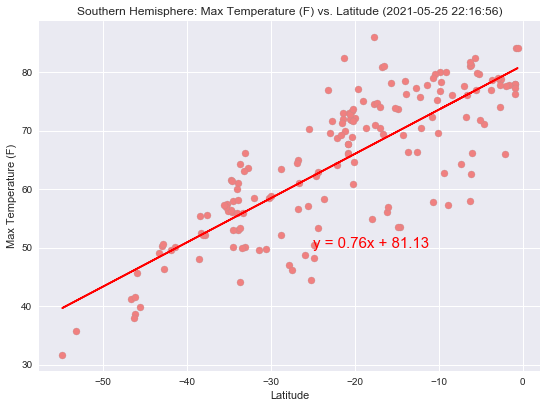

In [49]:
# Create Plot: Temp vs Lat (Southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Max Temp."], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Southern Hemisphere: Max Temperature (F) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_south.png")

# Show plot
plt.show()

### Analysis for Temperature vs. Latitude:
#### Using r-values from 4-22-21

There is a greater correlation between *temperature* and *latitude* in the **Northern Hemisphere** cities than the Southern Hemisphere cities, as the r-value is ***0.80*** for the Northern Hemisphere and ***0.53*** for the Southern Hemisphere. This means that in the Northern Hemisphere, as you get farther away from the equator, it will get colder. As well, in the Southern Hemisphere, as you get closer to the equator, it will most likely get warmer, with some exceptions (since the r-value is not as close to 1). 

# Humidity vs. Latitude

## Northern Hemisphere:

In [50]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Humidity"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      60.082894
1      70.953929
3      70.049426
5      65.580184
8      63.144827
         ...    
524    67.580110
526    68.988439
527    61.672964
529    63.075429
532    70.619718
Name: Latitude, Length: 364, dtype: float64
y = 0.16x + 59.59


The r-value is: 0.015260679127650672


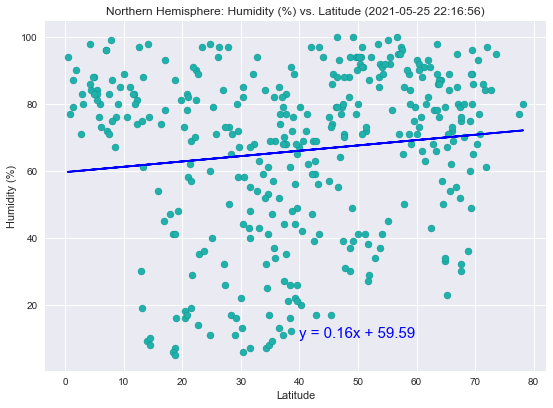

In [51]:
# Create Plot: Humidity vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Humidity"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere: Humidity (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (40,10), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [52]:
# Perform a linear regression on humidity vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Humidity"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)


2      75.492778
4      77.772481
6      67.169889
7      69.492037
14     69.298630
         ...    
522    74.238963
525    72.513719
528    76.678032
530    74.368942
531    76.444670
Name: Latitude, Length: 169, dtype: float64
y = 0.25x + 77.96


The r-value is: 0.00012475513902560596


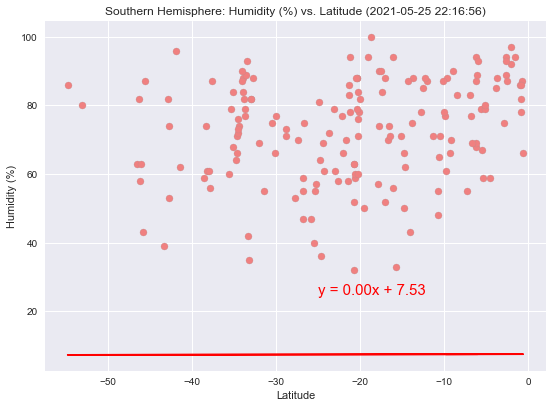

In [64]:
# Create Plot: Humidity vs Lat (Southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Humidity"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere: Humidity (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,25), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_south.png")

# Show plot
plt.show()

### Analysis for Humidity vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is hardly any correlation between *humidity* and *latitude*, since both r-values are close to 0. The northern hemisphere's r-value is *0.045*, which is greater than the southern hemisphere's r-value of *0.0085*, but they are still very low.


# Cloudiness vs. Latitude

## Northern Hemisphere:

In [54]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      56.182162
1      61.298890
3      60.873163
5      58.769601
8      57.623338
         ...    
524    59.710917
526    60.373783
527    56.930569
529    57.590674
532    61.141586
Name: Latitude, Length: 364, dtype: float64
y = 0.08x + 55.95


The r-value is: 0.001390905658085793


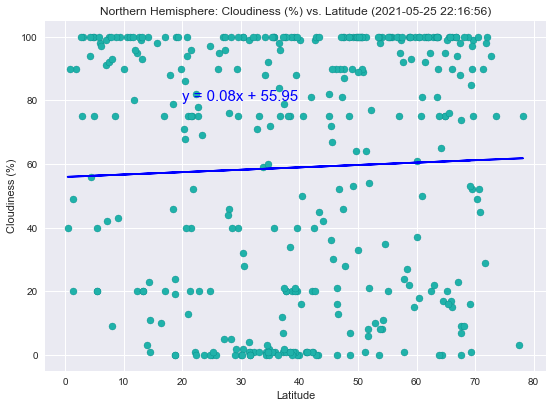

In [55]:
# Create Plot: Cloudiness vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere: Cloudiness (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (20,80), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [56]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

2      52.019253
4      53.201139
6      47.704344
7      48.908236
14     48.807966
         ...    
522    51.369226
525    50.474793
528    52.633734
530    51.436612
531    52.512750
Name: Latitude, Length: 169, dtype: float64
y = 0.13x + 53.30


The r-value is: 0.002068391742360479


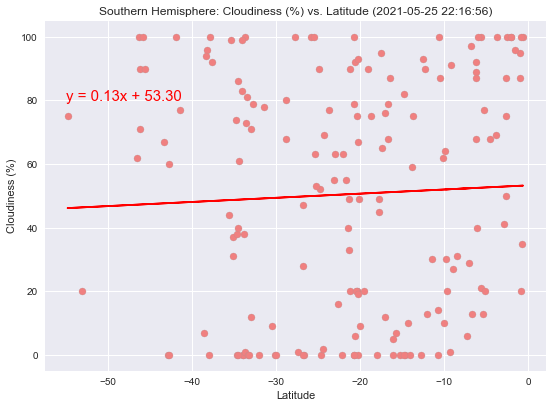

In [57]:
# Create Plot: Cloudiness vs Lat (southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere: Cloudiness (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-55,80), fontsize=15, color="r")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_south.png")

# Show plot
plt.show()

### Analysis for Cloudiness vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is close to no correlation between *cloudiness* and *latitude*. The Northern Hemisphere r-value of *0.045* suggests that there is no correlation between these two factors in that hemisphere. The r-value of the Southern Hemisphere is *0.0008*, which is even lower. This suggests that the cloudiness is not dependent on which degrees of latitude a city is in.


# Wind Speed vs. Latitude

## Northern Hemisphere:

In [58]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      8.245077
1      8.780703
3      8.736137
5      8.515934
8      8.395941
         ...   
524    8.614472
526    8.683862
527    8.323421
529    8.392522
532    8.764236
Name: Latitude, Length: 364, dtype: float64
y = 0.01x + 8.22


The r-value is: 0.0005971392924627803


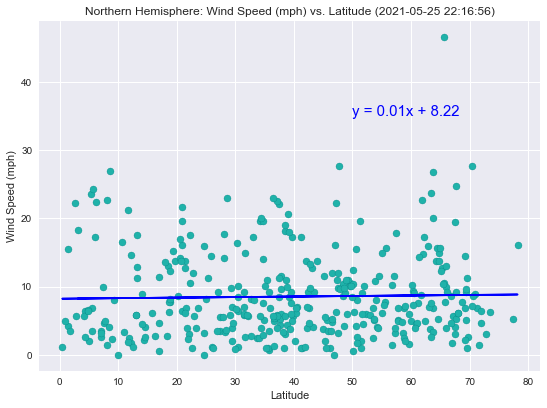

In [59]:
# Create Plot: wind speed vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere: Wind Speed (mph) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (50,35), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [60]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

2      7.492084
4      7.528623
6      7.358687
7      7.395905
14     7.392806
         ...   
522    7.471988
525    7.444336
528    7.511081
530    7.474071
531    7.507341
Name: Latitude, Length: 169, dtype: float64
y = 0.00x + 7.53


The r-value is: 0.00012475513902560596


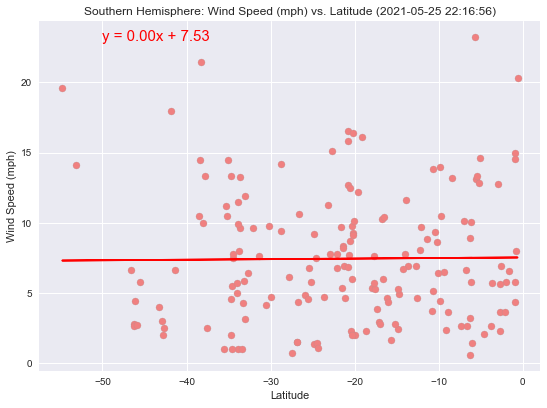

In [61]:
# Create Plot: wind speed vs Lat (southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere: Wind Speed (mph) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-50,23), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_south.png")

# Show plot
plt.show()

### Analysis for Wind Speed vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is also close to no correlation between *wind speed* and *latitude*. Both the Northern Hemisphere and the Southern hemisphere have r-values of *0.0008* suggesting there is no correlation between these factors. This means that it doesn't matter which hemisphere you are in, the wind speed varies within each degree of latitude. 